# 1. Комплексная частотная характеристика LTI системы (Продолжение)

$x[n] = e^{jwn}$

$y[n] = h[n]*x[n] = \sum\limits_{k=-\infty}^\infty h[k]\cdot x[n-k]$

$y[n] = h[n]*(e^{jwn}) = \sum\limits_{k=-\infty}^\infty h[k]\cdot e^{jw(n-k)} = \Big(\sum\limits_{k=-\infty}^\infty h[k]\cdot e^{-jwk} \Big) e^{jwn}$

$ H(e^{jw}) = \sum\limits_{k=-\infty}^\infty h[k]\cdot e^{-jwk}$ - комплексная частотная характеристика

$y[n] = H(e^{jw})\cdot e^{jwn}$

## АЧХ и ФЧХ

$ A(e^{jw}) = |H(e^{jw})| $ - амплитудо-частотная характеристика (АЧХ)

$ \phi(e^{jw}) = \angle H(e^{jw}) $ - фазо-частотная характеристика (ФЧХ)

## АЧХ скользящего среднего

$y[n] = S(x[n]) = \frac{1}{2M + 1}\sum\limits_{m=-M}^{M}x[n-m]$

$h[n] = S(\delta[n]) = \frac{1}{2M + 1}\sum\limits_{m=-M}^{M}\delta[n-m]$

$H(e^{jw}) = \sum\limits_{k=-\infty}^\infty h[k]\cdot e^{-jwk} = \sum\limits_{k=-\infty}^\infty \frac{1}{2M + 1} \sum\limits_{m=-M}^{M}\delta[k-m]\cdot e^{-jwk} $

$= \frac{1}{2M + 1} \sum\limits_{m=-M}^{M} \sum\limits_{k=-\infty}^\infty\delta[k-m]\cdot e^{-jwk} = \frac{1}{2M + 1} \sum\limits_{m=-M}^{M}e^{-jwm}$

$H(e^{jw}) = \frac{1}{2M + 1} \sum\limits_{m=-M}^{M}e^{-jwm} = \frac{1}{2M + 1} \sum\limits_{m=0}^{2M+1}e^{-jw (m -M)}$

$H(e^{jw}) = \frac{1}{2M + 1} \frac{sin\big(w(2M+1)/2\big)}{sin(w/2)}$


### Задача: 
Найти минимальное значение параметра сглаживания $M$, такое чтобы амплитуда гармонических последовательностей с частотой $w>\pi/16$ проходящих через скользящее среднее сокращалась на 50% и более.

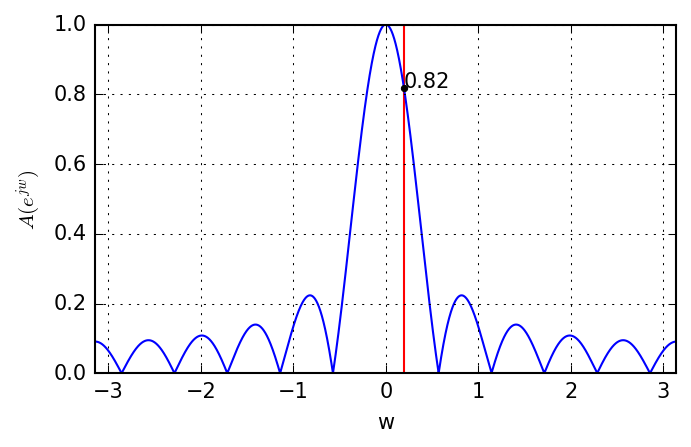

In [214]:
import numpy as np
import pylab as plt
plt.rcParams['axes.grid'] = True

M = 5
w = np.linspace(-np.pi*3, np.pi*3, 10000)
H_func = lambda w: np.abs(np.sin(w*(2*M+1)/2)/np.sin(w/2)/(2*M+1))
H = H_func(w)

plt.figure(dpi=150, figsize=(5,3))
plt.axvline(np.pi/16, color='r')
plt.plot(w, H)
plt.ylabel('$A(e^{jw})$')
plt.xlabel('w')
plt.xlim(-np.pi, np.pi)

Hpi16 = H_func(np.pi/16)
plt.plot(np.pi/16, Hpi16, 'k.-')
plt.text(np.pi/16, Hpi16, '{:.2f}'.format(Hpi16))

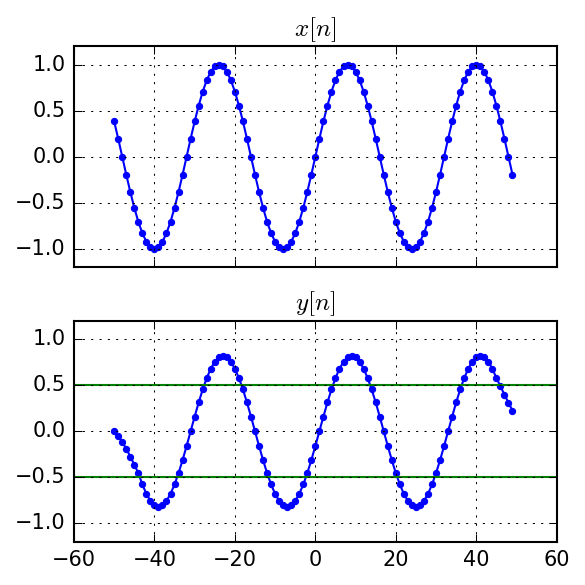

In [215]:
n = np.arange(-50, 50)

h = 1/(2*M+1) * np.sum([(n==-k).astype(int) for k in range(-M, M+1)], 0)

#w = np.pi*2/3
w = np.pi/16
x = np.sin(w*n)
y = np.convolve(x, h, 'same')


fig, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(4,4), dpi=150)

ax[0].plot(n, x, '.-')
ax[0].set_title('$x[n]$')

ax[1].plot(n, y, '.-')
ax[1].set_title('$y[n]$')
ax[1].axhline(0.5, color='g')
ax[1].axhline(-0.5, color='g')


plt.ylim(-1.2, 1.2)
plt.tight_layout()

# 2. Преобразование Фурье дискретных сигналов

Многие последовательности представимы в виде:

$X(e^{j\omega}) = \sum\limits_{n=-\infty}^{\infty}x[n]e^{-j\omega n}$ - прямое преобразование Фурье

$x[n] = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}X(e^{j\omega})e^{j\omega n}d\omega$ - обратное преобразование Фурье




## Теоремы о преобразовании Фурье
![](imag/lecture4-ft-theorems.png "Title")


## Пары связанные преобразованием Фурье
![](imag/lecture4-ft-pairs.png "Title")

### Пример

Докажем свойство 4 

$x[n] = a^n u[n]$

$X(e^{j\omega}) = \sum\limits_{n=-\infty}^{\infty}x[n]e^{-j\omega n}$

$X(e^{j\omega}) = \sum\limits_{n=-\infty}^{\infty}a^n u[n]e^{-j\omega n}$

$X(e^{j\omega}) = \sum\limits_{n=0}^{\infty}a^n e^{-j\omega n}$

$X(e^{j\omega}) = \sum\limits_{n=0}^{\infty}(a e^{-j\omega})^ n$

$X(e^{j\omega}) = \frac{1}{1 - ae^{-j\omega}}$


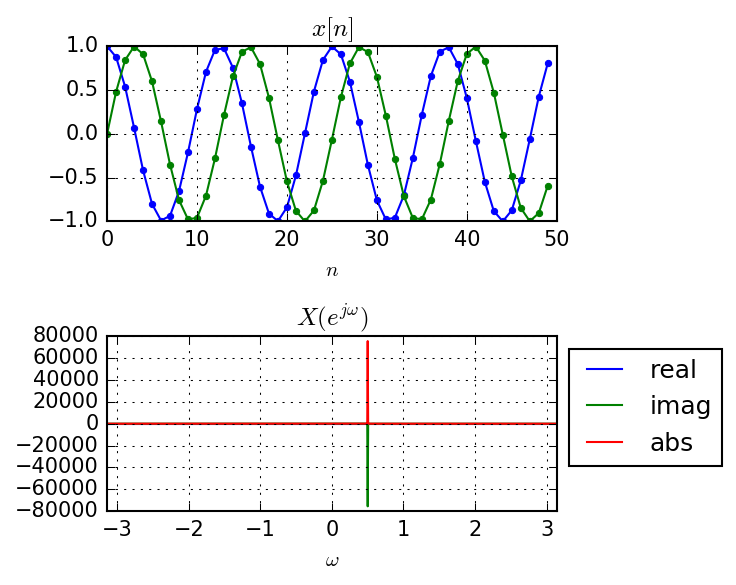

In [221]:
#a = 4/5
a = 1*np.exp(1j*0.5)

n = np.arange(0, 50)
x = a**n*(n>=0)

w = np.linspace(-np.pi, np.pi, 1000)
X = 1/(1-a*np.exp(-1j*w))



fig, ax = plt.subplots(2, figsize=(4,4), dpi=150)
ax[0].plot(n, x.real, '.-')
ax[0].plot(n, x.imag, '.-')
ax[0].set_title('$x[n]$')
ax[0].set_xlabel('$n$')
#ax[0].set_ylim(-0.5, 1.5)


ax[1].set_title('$X(e^{j\omega})$')
ax[1].set_xlabel('$\omega$')
ax[1].plot(w, X.real, '-', label='real')
ax[1].plot(w, X.imag, '-', label='imag')
ax[1].plot(w, np.abs(X), '-', label='abs')

ax[1].legend(loc=2, bbox_to_anchor=(1, 1))
ax[1].set_xlim(-np.pi, np.pi)
plt.tight_layout()

## Идеальный фильтр низких частот (lowpass filter)

$H(e^{j\omega}) = \begin{cases} 1, |\omega|\le\omega_c,\\ 0, \omega_c<|\omega|<\pi\\ \end{cases}$

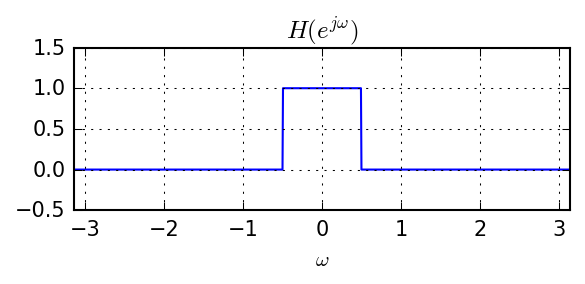

In [222]:
w_c = 0.5
w = np.linspace(-np.pi, np.pi, 1000)
H = np.zeros_like(w)
H [np.abs(w)<=w_c] = 1



fig, ax = plt.subplots(1, figsize=(4,2), dpi=150)

ax.set_title('$H(e^{j\omega})$')
ax.set_xlabel('$\omega$')
ax.plot(w, H, '-')
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-0.5, 1.5)
plt.tight_layout()


КЧХ и импульсная характеристика связаны преобразованием Фурье:

$ H(e^{j\omega}) = \sum\limits_{k=-\infty}^\infty h[k]\cdot e^{-j\omega k}$ 

$h[n] = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}H(e^{j\omega})e^{j\omega n}d\omega$

$h[n] = \frac{1}{2\pi}\int\limits_{-w_c}^{w_c}e^{j\omega n}d\omega$

При $n\ne0$:

$h[n] = \frac{1}{2\pi jn}e^{j\omega n}\Big|_{-w_c}^{w_c} = \frac{1}{2\pi jn}\Big(e^{j\omega_c n} - e^{-j\omega_c n}\Big) = \frac{sin(\omega_c n)}{\pi n}$

Для $n=0$:

$h[0] = \frac{\omega_c}{\pi n}$

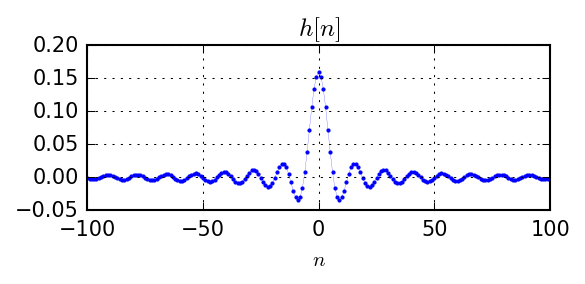

In [223]:
w_c = 0.5
n = np.arange(-100, 100)
h = np.sin(w_c*n)/np.pi
h[n!=0] /= n[n!=0]
h[n==0] = w_c/np.pi


fig, ax = plt.subplots(1, figsize=(4,2), dpi=150)

ax.set_title('$h[n]$')
ax.set_xlabel('$n$')
ax.plot(n, h,'.-', markersize=3, linewidth=0.1)
#ax.set_ylim(-0.5, 1.5)
plt.tight_layout()

Заменим $h[n]$ на конечную последовательность $h_M[n]$:


$h_M[n] = \begin{cases} h[n], |n|\le M,\\ 0, M < |n|\\ \end{cases}$

Рассмотрим как ведет себя КЧХ для систем с испульсной характеристикой $h_M[n]$:

$ H_M(e^{j\omega}) = \sum\limits_{k=-M}^M \frac{sin(\omega_c n)}{\pi n}\cdot e^{-j\omega k}$ 

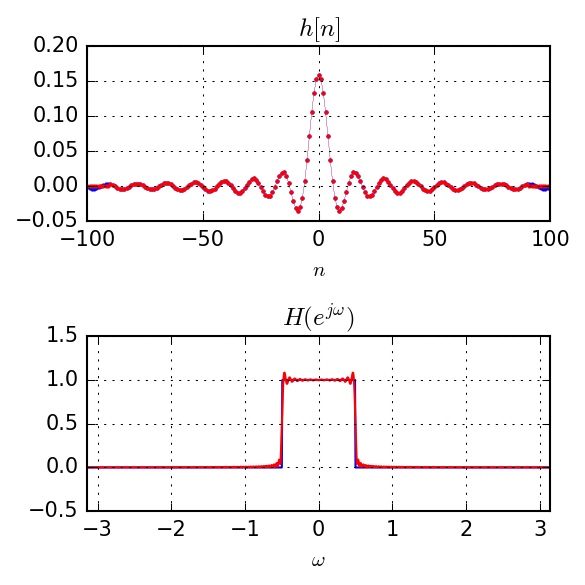

In [228]:
M = 90
w_c = 0.5
n = np.arange(-100, 100)

h = np.sin(w_c*n)/np.pi
h[n!=0] /= n[n!=0]
h[n==0] = w_c/np.pi

h_M = h.copy()
h_M[np.abs(n)>M] = 0



fig, ax = plt.subplots(2, figsize=(4,4), dpi=150)

ax[0].set_title('$h[n]$')
ax[0].set_xlabel('$n$')
ax[0].plot(n, h, '.-', markersize=3, linewidth=0.1)
ax[0].plot(n, h_M, 'r.-', markersize=3, linewidth=0.1)
#ax.set_ylim(-0.5, 1.5)
plt.tight_layout()

w_c = 0.5
w = np.linspace(-np.pi, np.pi, 1000)
H = np.zeros_like(w)
H [np.abs(w)<=w_c] = 1
H_M = np.sum([h_M[k]*np.exp(-1j*w*n[k]) for k in range(len(n)) if np.abs(n[k])<=M], 0)

ax[1].set_title('$H(e^{j\omega})$')
ax[1].set_xlabel('$\omega$')
ax[1].plot(w, H, '-')
ax[1].plot(w, np.abs(H_M), 'r-')
ax[1].set_xlim(-np.pi, np.pi)
ax[1].set_ylim(-0.5, 1.5)
plt.tight_layout()
plt.tight_layout()




### Определение импульсной характерисики по разностному уравнению



Пусть $y[n] = S(x[n])$ такая что

$y[n] - 0.5\cdot y[n-1] = x[n] - 0.25\cdot x[n-1]$

Найдем $h[n]$

Пусть $x[n] = \delta[n]$. Так как $h[n] = S(\delta[n])$ то

$h[n] - 0.5\cdot h[n-1] = \delta[n] - 0.25\cdot \delta[n-1]$




Применим преобразование фурье:

$H(e^{j\omega}) - 0.5\cdot e^{-j\omega}\cdot H(e^{j\omega}) = 1 - 0.25\cdot e^{-j\omega}$

$H(e^{j\omega}) = \frac{1-0.25e^{-j\omega}}{1-0.5e^{-j\omega}} $

$H(e^{j\omega}) = \frac{1}{1-0.5e^{-j\omega}} - 0.25\frac{1}{1-0.5e^{-j\omega}}e^{-j\omega}$ 

$h[n] = 0.5^n\cdot u[n] - 0.25\cdot 0.5^{n-1} u[n-1]$